¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid", palette="pastel")



## Cargar datos

In [64]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Bien hecho! Usaste correctamente una celda independiente para importar las librerías y otra para leer los datos.
</div>

## Preparar los datos

## Tarifas

In [65]:
plans.info

<bound method DataFrame.info of    messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  >

In [66]:
display(plans.head(20))


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos.
</div>

## Corregir datos

In [67]:
print("\nPlans:")
print(plans.isnull().sum())


Plans:
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


## Enriquecer los datos

NO ES NECESARIO CAMBIAR NI AGREGAR NADA

## Usuarios/as

In [68]:
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [69]:
display(users.head(10))


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena exploración de la tabla de los usuarios.
</div>

### Corregir los datos

In [70]:
print(users.isnull().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [71]:
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')

In [72]:
users['is_active'] = users['churn_date'].isna()

In [73]:
users = users.drop_duplicates()

In [74]:
print("Tipos de datos actualizados:")
users.info()



Tipos de datos actualizados:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   is_active   500 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(4)
memory usage: 35.6+ KB


In [75]:
print("\nPlanes disponibles:")
print(users['plan'].unique())


Planes disponibles:
['ultimate' 'surf']


In [76]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo, corregiste correctamente los datos en la tabla de usuarios.
</div>

## Llamadas

In [77]:
calls.info()
print(calls.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [78]:
calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Aquí solo hay que convertir la fecha a datetime y eliminar duplicados

### Corregir los datos

In [79]:
calls['call_date'] = pd.to_datetime(calls['call_date'], errors='coerce')
calls = calls.drop_duplicates()
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.3+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena exploración de los duplicados.
</div>

### Enriquecer los datos

Aquí creo que puede ser útil dividir por días de la semana.

In [80]:
calls['day_of_week'] = calls['call_date'].dt.day_name()
calls[['user_id', 'call_date', 'day_of_week']].head()

,user_id,call_date,day_of_week
0,1000,2018-12-27,Thursday
1,1000,2018-12-27,Thursday
2,1000,2018-12-27,Thursday
3,1000,2018-12-28,Friday
4,1000,2018-12-30,Sunday


## Mensajes

In [81]:
messages.info()
print(messages.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
id              0
user_id         0
message_date    0
dtype: int64


In [82]:
messages.head()



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Corregir los datos

In [83]:
messages['message_date'] = pd.to_datetime(messages['message_date'], errors='coerce')
messages = messages.drop_duplicates()
messages.info()
messages.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.3+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Enriquecer los datos

Hagamos lo mismo que con las llamadas.

In [84]:
messages['day_of_week'] = messages['message_date'].dt.day_name()
messages[['user_id', 'message_date', 'day_of_week']].head()

,user_id,message_date,day_of_week
0,1000,2018-12-27,Thursday
1,1000,2018-12-31,Monday
2,1000,2018-12-31,Monday
3,1000,2018-12-27,Thursday
4,1000,2018-12-26,Wednesday


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen manejo de las columnas de tipo fecha.
</div>

## Internet

In [85]:
internet.info()
print(internet.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [86]:
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Corregir los datos

In [87]:
internet['session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')
internet = internet.drop_duplicates()
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.0+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Se han tratado correctamente los datos de los mensajes.
</div>

## Estudiar las condiciones de las tarifas

In [88]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

display(plans)



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, solo recuerda que no es necesario volver a importar la librería pandas, esta ya se ha importado al inicio del notebook y solo basta con una ejecución para ser importada.
</div>

In [89]:
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year

calls_per_user_month = calls.groupby(['user_id', 'year', 'month'])['id'].count().reset_index()
calls_per_user_month.columns = ['user_id', 'year', 'month', 'calls_made']
calls_per_user_month.head()




,user_id,year,month,calls_made
0,1000,2018,12,16
1,1001,2018,8,27
2,1001,2018,9,49
3,1001,2018,10,65
4,1001,2018,11,64


In [90]:
minutes_per_user_month = calls.groupby(['user_id', 'year', 'month'])['duration'].sum().reset_index()
minutes_per_user_month.columns = ['user_id', 'year', 'month', 'minutes_used']
minutes_per_user_month.head()

,user_id,year,month,minutes_used
0,1000,2018,12,116.83
1,1001,2018,8,171.14
2,1001,2018,9,297.69
3,1001,2018,10,374.11
4,1001,2018,11,404.59


In [91]:
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year

messages_per_user_month = messages.groupby(['user_id', 'year', 'month'])['id'].count().reset_index()
messages_per_user_month.columns = ['user_id', 'year', 'month', 'messages_sent']
messages_per_user_month.head()



,user_id,year,month,messages_sent
0,1000,2018,12,11
1,1001,2018,8,30
2,1001,2018,9,44
3,1001,2018,10,53
4,1001,2018,11,36


In [92]:
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year

internet_per_user_month = internet.groupby(['user_id', 'year', 'month'])['mb_used'].sum().reset_index()
internet_per_user_month.columns = ['user_id', 'year', 'month', 'mb_used']
internet_per_user_month.head()



,user_id,year,month,mb_used
0,1000,2018,12,1901.47
1,1001,2018,8,6919.15
2,1001,2018,9,13314.82
3,1001,2018,10,22330.49
4,1001,2018,11,18504.30


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente trabajo! Se extrajo correctamente el mes y año de todos los registros en los data frames.
</div>

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [93]:
from functools import reduce
dfs = [calls_per_user_month, minutes_per_user_month, messages_per_user_month, internet_per_user_month]
df_final = reduce(lambda left, right: pd.merge(left, right, on=['user_id', 'year', 'month'], how='outer'), dfs)
df_final = df_final.fillna(0)
df_final.head()



,user_id,year,month,calls_made,minutes_used,messages_sent,mb_used
0,1000,2018,12,16.0,116.83,11.0,1901.47
1,1001,2018,8,27.0,171.14,30.0,6919.15
2,1001,2018,9,49.0,297.69,44.0,13314.82
3,1001,2018,10,65.0,374.11,53.0,22330.49
4,1001,2018,11,64.0,404.59,36.0,18504.30


In [94]:
df_final = df_final.merge(users[['user_id', 'plan']], on='user_id', how='left')
df_final.head()

,user_id,year,month,calls_made,minutes_used,messages_sent,mb_used,plan
0,1000,2018,12,16.0,116.83,11.0,1901.47,ultimate
1,1001,2018,8,27.0,171.14,30.0,6919.15,surf
2,1001,2018,9,49.0,297.69,44.0,13314.82,surf
3,1001,2018,10,65.0,374.11,53.0,22330.49,surf
4,1001,2018,11,64.0,404.59,36.0,18504.30,surf


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Perfecto! Usaste correctamente el merge para unir la información de los usuarios.
</div>

In [95]:
# Vamos a fusionar los DF.

In [96]:
from functools import reduce

dfs = [calls_per_user_month, minutes_per_user_month, messages_per_user_month, internet_per_user_month]
user_usage = reduce(lambda left, right: pd.merge(left, right, on=['user_id', 'year', 'month'], how='outer'), dfs)
user_usage = user_usage.fillna(0)
user_usage = user_usage.merge(users[['user_id', 'plan']], on='user_id', how='left')
user_usage.head()


,user_id,year,month,calls_made,minutes_used,messages_sent,mb_used,plan
0,1000,2018,12,16.0,116.83,11.0,1901.47,ultimate
1,1001,2018,8,27.0,171.14,30.0,6919.15,surf
2,1001,2018,9,49.0,297.69,44.0,13314.82,surf
3,1001,2018,10,65.0,374.11,53.0,22330.49,surf
4,1001,2018,11,64.0,404.59,36.0,18504.30,surf


In [97]:
# Primero, fusionamos df_final con plans para tener los límites y tarifas
df_final = df_final.merge(plans, left_on='plan', right_on='plan_name', how='left')

# Calcular exceso de llamadas, mensajes y datos (sin negativos)
df_final['extra_calls'] = (df_final['calls_made'] - df_final['minutes_included']).clip(lower=0)
df_final['extra_minutes'] = (df_final['minutes_used'] - df_final['minutes_included']).clip(lower=0)
df_final['extra_messages'] = (df_final['messages_sent'] - df_final['messages_included']).clip(lower=0)
df_final['extra_mb'] = (df_final['mb_used'] - df_final['mb_per_month_included']).clip(lower=0)

# Calcular costo de excesos
df_final['extra_calls_cost'] = df_final['extra_calls'] * df_final['usd_per_minute']
df_final['extra_minutes_cost'] = df_final['extra_minutes'] * df_final['usd_per_minute']
df_final['extra_messages_cost'] = df_final['extra_messages'] * df_final['usd_per_message']
df_final['extra_mb_cost'] = (df_final['extra_mb'] / 1024) * df_final['usd_per_gb']  # Convertir MB a GB

# Calcular ingreso total mensual
df_final['monthly_revenue'] = df_final['usd_monthly_pay'] + df_final['extra_calls_cost'] + df_final['extra_minutes_cost'] + df_final['extra_messages_cost'] + df_final['extra_mb_cost']

# Mostrar resultado final
df_final[['user_id', 'year', 'month', 'monthly_revenue']].head()


,user_id,year,month,monthly_revenue
0,1000,2018,12,70.000000
1,1001,2018,8,20.000000
2,1001,2018,9,20.000000
3,1001,2018,10,88.161191
4,1001,2018,11,50.706055


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo calculando la ganancia mensual para cada usuario.
</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

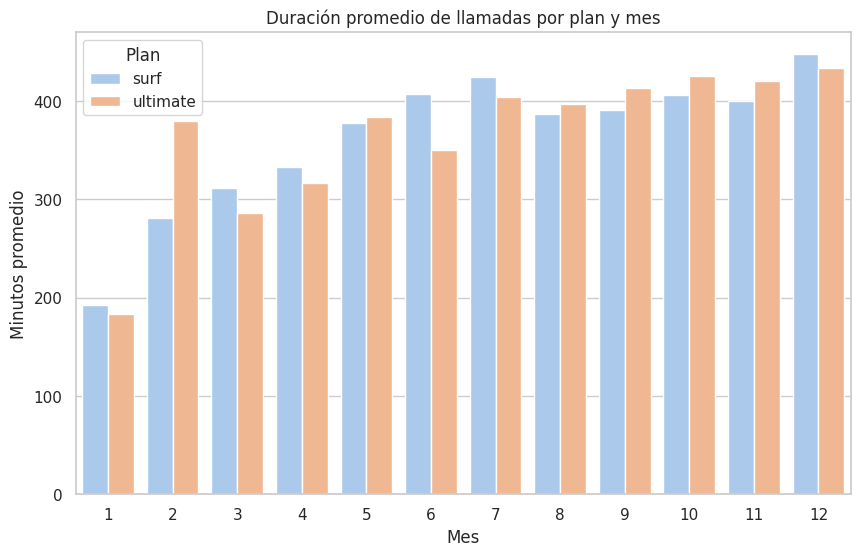

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_duration = user_usage.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_duration, x='month', y='minutes_used', hue='plan')
plt.title('Duración promedio de llamadas por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Minutos promedio')
plt.legend(title='Plan')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, esta gráfica de barras es correcta. Me gusta que usaste seaborn porque se ve un poco más elegante que matplotlib solo.
</div>

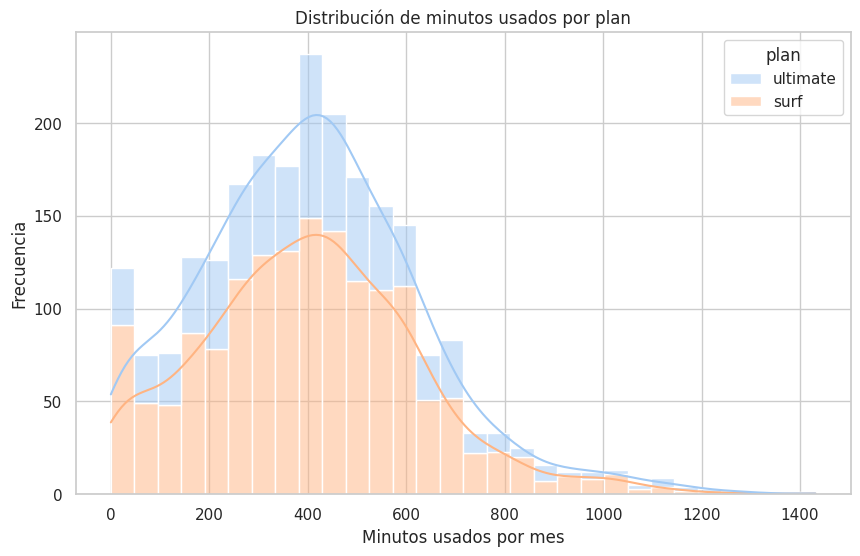

In [99]:
plt.figure(figsize=(10,6))
sns.histplot(data=user_usage, x='minutes_used', hue='plan', kde=True, multiple='stack', bins=30)
plt.title('Distribución de minutos usados por plan')
plt.xlabel('Minutos usados por mes')
plt.ylabel('Frecuencia')
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de la distribución kernel para acompañar al histograma.
</div>

In [100]:
mean_var_minutes = user_usage.groupby('plan')['minutes_used'].agg(['mean', 'var']).reset_index()
mean_var_minutes


,plan,mean,var
0,surf,404.762390,49135.104891
1,ultimate,406.193083,51640.971402


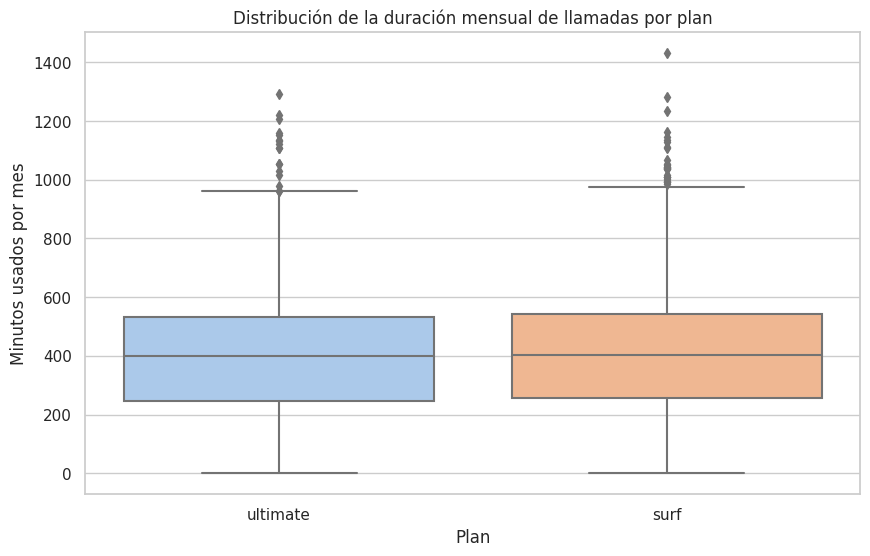

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=user_usage, x='plan', y='minutes_used')
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos usados por mes')
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente trabajo con los boxplots! Al estar en el mismo eje es fácil comparar las dos distribuciones.
</div>

COMENTARIOS
Podemos notar que el plan Ultimate consume más minutos, lo cual tiene congruencia con la característica del plan.
La varianza también es mayor en el plan Ultimate, demostrando que algunos usuarios unas mucho y otros muy poco. Los usuarios surf son mas homogéneos.


### Mensajes

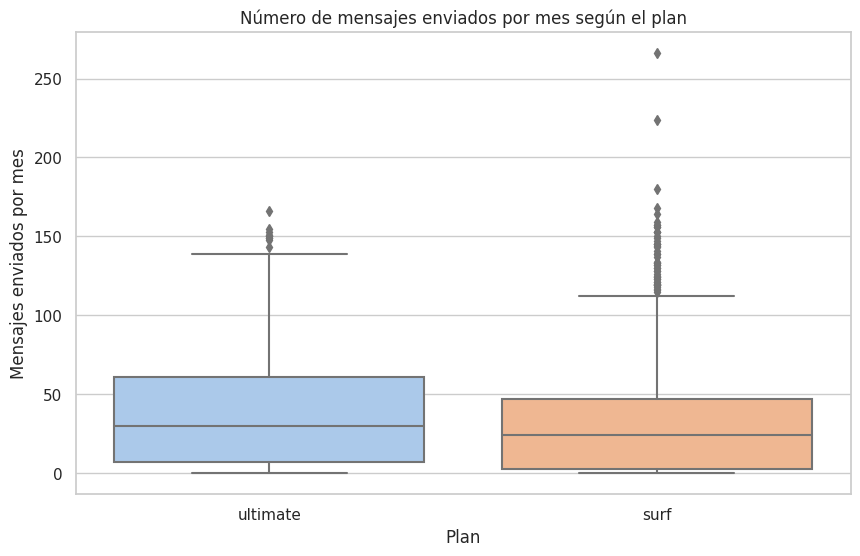

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=user_usage, x='plan', y='messages_sent')
plt.title('Número de mensajes enviados por mes según el plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes enviados por mes')
plt.show()




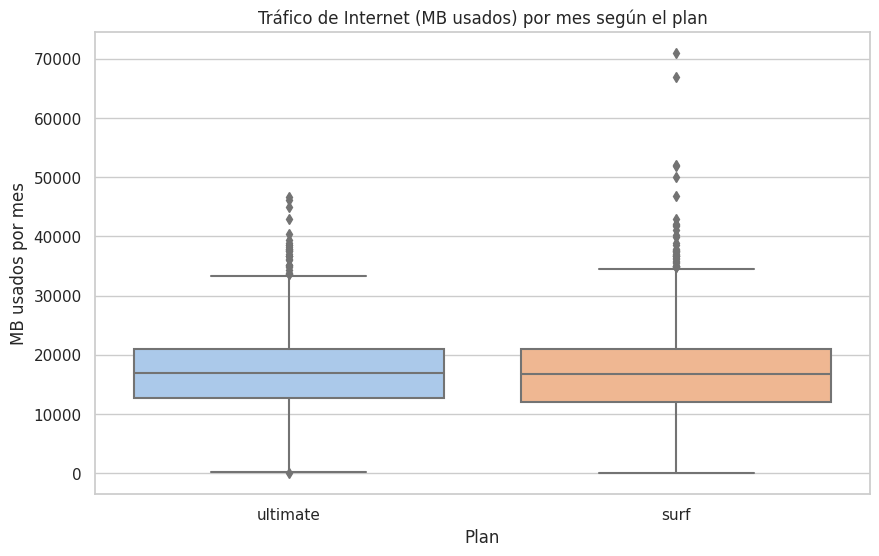

In [103]:
plt.figure(figsize=(10,6))
sns.boxplot(data=user_usage, x='plan', y='mb_used')
plt.title('Tráfico de Internet (MB usados) por mes según el plan')
plt.xlabel('Plan')
plt.ylabel('MB usados por mes')
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena comparación de los mensajes y del internet usado mensualmente.
</div>

Los usuarios ultimate envían más mensajes al mes en promedio, los del plan Surf tienden a ser más moderados. Lo mismo con el consumo del internet.

### Internet

In [104]:
user_usage.groupby('plan')['mb_used'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,16558.283490,8013.513327,0.0,11986.520,16829.31,20999.6100,70931.59
ultimate,720.0,17214.699694,7851.897435,0.0,12666.955,16858.34,21014.5275,46595.33


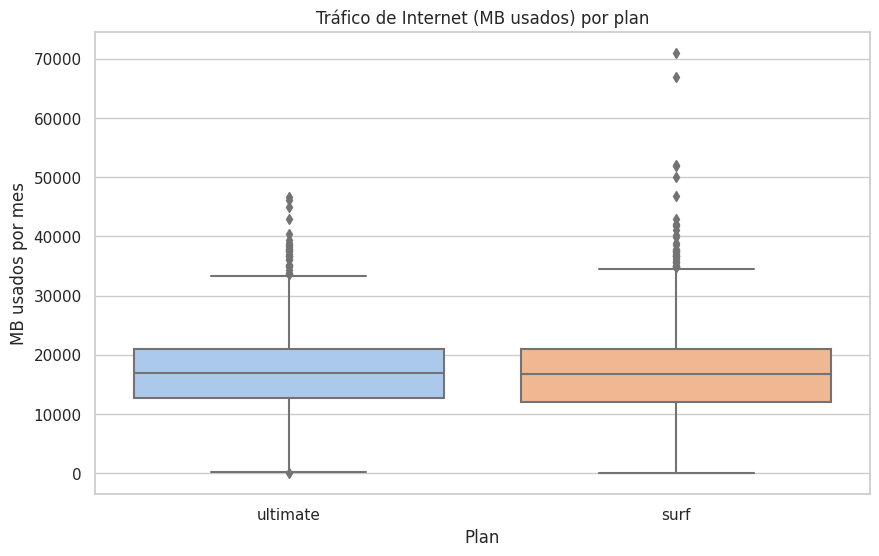

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=user_usage, x='plan', y='mb_used')
plt.title('Tráfico de Internet (MB usados) por plan')
plt.xlabel('Plan')
plt.ylabel('MB usados por mes')
plt.show()


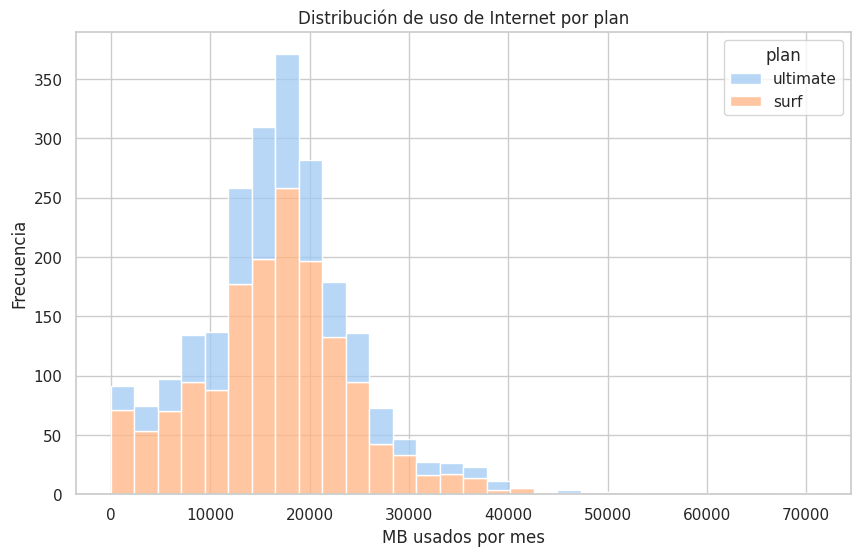

In [106]:
plt.figure(figsize=(10,6))
sns.histplot(data=user_usage, x='mb_used', hue='plan', multiple='stack', bins=30)
plt.title('Distribución de uso de Internet por plan')
plt.xlabel('MB usados por mes')
plt.ylabel('Frecuencia')
plt.show()


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen histograma, como sugerencia recuerda usar el parámetro alpha para darle transparencia a las barras y es mejor si tomas la densidad en lugar de la frecuencia, para que no afecte el volumen de cada uno de los dos grupos.
</div>

Los usuarios ultimate consumen más datos en promedio que los surf, con una distribución más dispersa y mayores valores atípicos. Esto confirma que el comportamiento de los usuarios está influenciado por el tipo de plan contratado.

## Ingreso

In [107]:
user_usage = user_usage.merge(plans, left_on='plan', right_on='plan_name', how='left')
print(user_usage.columns)

Index(['user_id', 'year', 'month', 'calls_made', 'minutes_used',
       'messages_sent', 'mb_used', 'plan', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name'],
      dtype='object')


In [108]:
user_usage['extra_minutes'] = (user_usage['minutes_used'] - user_usage['minutes_included']).clip(lower=0)
user_usage['extra_messages'] = (user_usage['messages_sent'] - user_usage['messages_included']).clip(lower=0)
user_usage['extra_mb'] = (user_usage['mb_used'] - user_usage['mb_per_month_included']).clip(lower=0)

user_usage['extra_minutes_cost'] = user_usage['extra_minutes'] * user_usage['usd_per_minute']
user_usage['extra_messages_cost'] = user_usage['extra_messages'] * user_usage['usd_per_message']
user_usage['extra_mb_cost'] = (user_usage['extra_mb'] / 1024) * user_usage['usd_per_gb']

user_usage['monthly_revenue'] = user_usage['usd_monthly_pay'] + user_usage['extra_minutes_cost'] + user_usage['extra_messages_cost'] + user_usage['extra_mb_cost']


In [109]:
user_usage.groupby('plan')['monthly_revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,57.293784,53.735882,20.0,20.0,36.6818,76.850586,581.328509
ultimate,720.0,72.116080,10.768848,70.0,70.0,70.0000,70.000000,178.522764


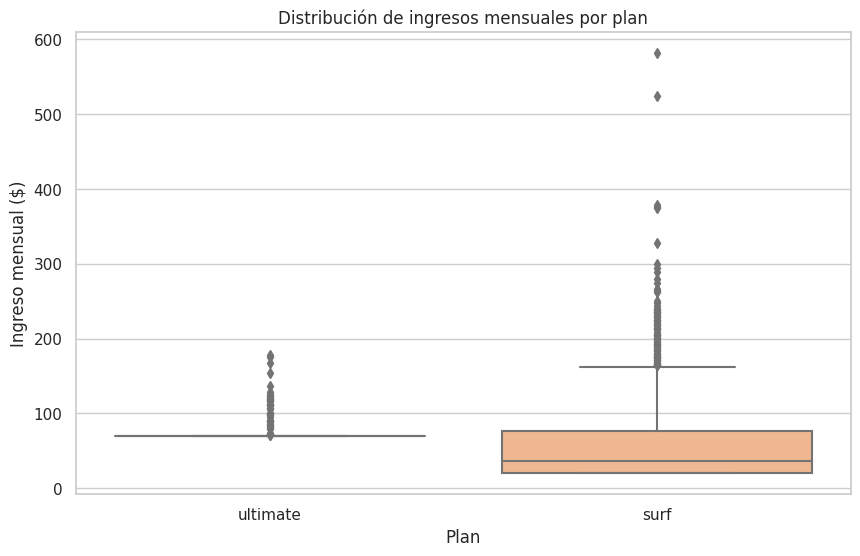

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=user_usage, x='plan', y='monthly_revenue')
plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso mensual ($)')
plt.show()


El plan Ultimate genera ingresos más estables y predecibles: la mayoría de los usuarios pagan un monto fijo cercano a los 70 USD, como se observa en la caja estrecha y concentrada del gráfico. En cambio, el plan Surf muestra una mayor variabilidad en los ingresos, con algunos usuarios pagando mucho más debido a cargos por exceso de minutos, mensajes o datos. Esto se refleja en la caja más ancha y en los outliers dispersos en la parte superior de la gráfica, que indican usuarios con pagos significativamente más altos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen boxplot para comparar los ingresos en cada uno los planes. La caja pequeña en efecto muestra que los ingresos son más constantes y no tiene mucha variabilidad.
</div>

## Prueba las hipótesis estadísticas

Hipótesis nula: No hay diferencia significativa en los ingresos promedio de los usuarios de los planes Ultimate y Surf.

Hipótesis alternativa: Sí hay una diferencia significativa en los ingresos promedio de los usuarios de los planes Ultimate y Surf.

Prueba t-student.
Alfa: 0.05

In [111]:
from scipy import stats

ultimate_revenue = user_usage[user_usage['plan'] == 'ultimate']['monthly_revenue']
surf_revenue = user_usage[user_usage['plan'] == 'surf']['monthly_revenue']

alpha = 0.05
t_stat, p_value = stats.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

print(f'Estadístico t: {t_stat:.3f}')
print(f'Valor p: {p_value:.5f}')

if p_value < alpha:
    print('Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio.')
else:
    print('No se rechaza la hipótesis nula: No hay una diferencia significativa en los ingresos promedio.')



Estadístico t: 10.489
Valor p: 0.00000
Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

H₀: No hay diferencia significativa en el ingreso promedio entre los usuarios del área NY-NJ y los de otras regiones.

H₁: Hay una diferencia significativa en el ingreso promedio entre los usuarios del área NY-NJ y los de otras regiones.

Prueba t-student.
Alfa: 0.05

In [112]:
user_usage = user_usage.merge(users[['user_id', 'city']], on='user_id', how='left')

user_usage['is_ny_nj'] = user_usage['city'].str.contains('New York|NY|NJ', case=False, na=False)


In [113]:
user_usage['is_ny_nj'] = user_usage['city'].str.contains('New York|NY|NJ', case=False, na=False)

In [114]:
from scipy import stats

ny_nj_revenue = user_usage[user_usage['is_ny_nj']]['monthly_revenue']
other_revenue = user_usage[~user_usage['is_ny_nj']]['monthly_revenue']

alpha = 0.05
t_stat, p_value = stats.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print(f'Estadístico t: {t_stat:.3f}')
print(f'Valor p: {p_value:.5f}')

if p_value < alpha:
    print('Rechazamos H0: Hay una diferencia significativa en el ingreso promedio.')
else:
    print('No se rechaza H0: No hay diferencia significativa en el ingreso promedio.')


Estadístico t: -0.668
Valor p: 0.50409
No se rechaza H0: No hay diferencia significativa en el ingreso promedio.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. Los p valores se han evaluado correctamente.
</div>


CONCLUSIÓN GENERAL

El análisis mostró que los usuarios del plan Ultimate generan ingresos más altos y estables, mientras que el plan Surf presenta ingresos más bajos y variables, con algunos usuarios pagando más por cargos adicionales. No se encontraron diferencias significativas en los ingresos promedio según la región geográfica, lo que indica que la ubicación no es un factor clave en el comportamiento de consumo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas conclusiones, basadas en lo realizado a lo largo de todo el proyecto.
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola!

Te quiero felicitar por tu proyecto, está bastante completo y bien realizado. Me gustaron especialmente tus gráficas, las realizaste correctamente y están completamente autocontenidas, se podrían usar por ejemplo en un reporte. También tu calculo de los p valores para las pruebas de hipótesis fue correcto

Solo realicé unos comentarios opcionales de color amarillo, pero no son necesarios para aprobar el proyecto. Te deseo mucho éxito en los siguientes sprints.

Saludos, Marcos.
</div>